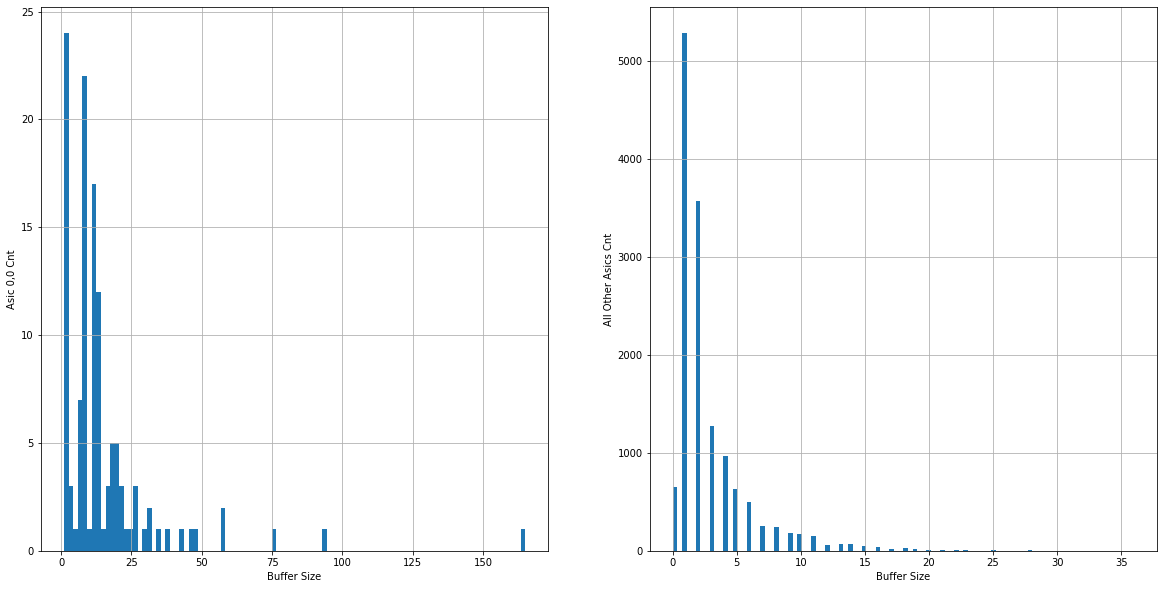

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np

# pd = pd.read_csv("output_data/parameter_frame.csv")
# pd = pd.read_csv("output_data/output_df30.csv")
data_df = pd.read_csv("output_df.csv")

# extract params into columns
# data_df["Params"] = data_df["Params"].apply(literal_eval)

# Remote Max
fig, ax = plt.subplots(1, 2, figsize=(20,10))
asic0 = data_df[(data_df["AsicX"] == 0) & (data_df["AsicY"] == 0)]
asic_other = data_df[(data_df["AsicX"] != 0) & (data_df["AsicY"] != 0)]

h1 = asic0["Remote Max"].hist(ax=ax[0], bins=100)
h2 = asic_other["Remote Max"].hist(ax=ax[1], bins=100)
ax[0].set_xlabel("Buffer Size")
ax[1].set_xlabel("Buffer Size")
ax[0].set_ylabel("Asic 0,0 Cnt")
ax[1].set_ylabel("All Other Asics Cnt")
plt.savefig("Buffers.png")


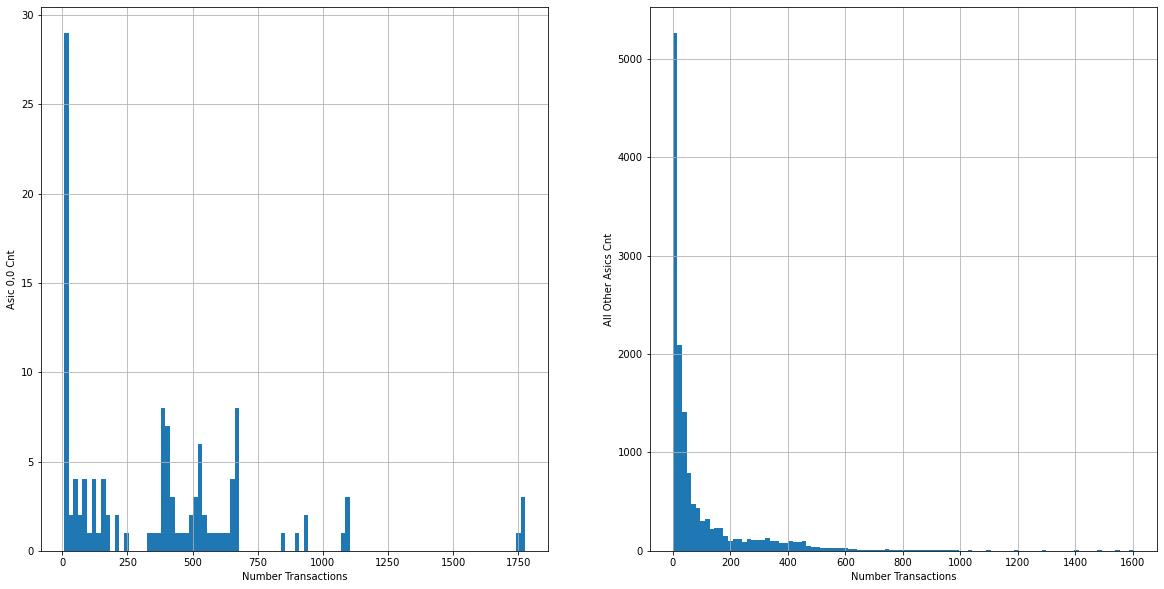

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
asic0 = data_df[(data_df["AsicX"] == 0) & (data_df["AsicY"] == 0)]
asic_other = data_df[(data_df["AsicX"] != 0) & (data_df["AsicY"] != 0)]

h1 = asic0["Remote Transactions"].hist(ax=ax[0], bins=100)
h2 = asic_other["Remote Transactions"].hist(ax=ax[1], bins=100)

ax[0].set_xlabel("Number Transactions")
ax[1].set_xlabel("Number Transactions")
ax[0].set_ylabel("Asic 0,0 Cnt")
ax[1].set_ylabel("All Other Asics Cnt")
plt.savefig("Transactions.png")

In [3]:
val = 0b1010_1010_1010_1010_1010_1010_1010_1010
nval = 0b0101_0101_0101_0101_0101_0101_0101_0101
max = 0xffff_ffff
print((val - nval)/max)

0.3333333333333333


In [4]:
timeouts = list(set(data_df["Timeout"].values))
IntPeriods = list(set(data_df["IntPeriod"].values))

# color on timesouts
colors = plt.cm.rainbow(np.linspace(0, 1, len(IntPeriods)))
 
# shape on int periods
shapes = ['.', "^", "+", "o"]

print(len(timeouts), len(IntPeriods))

4 6


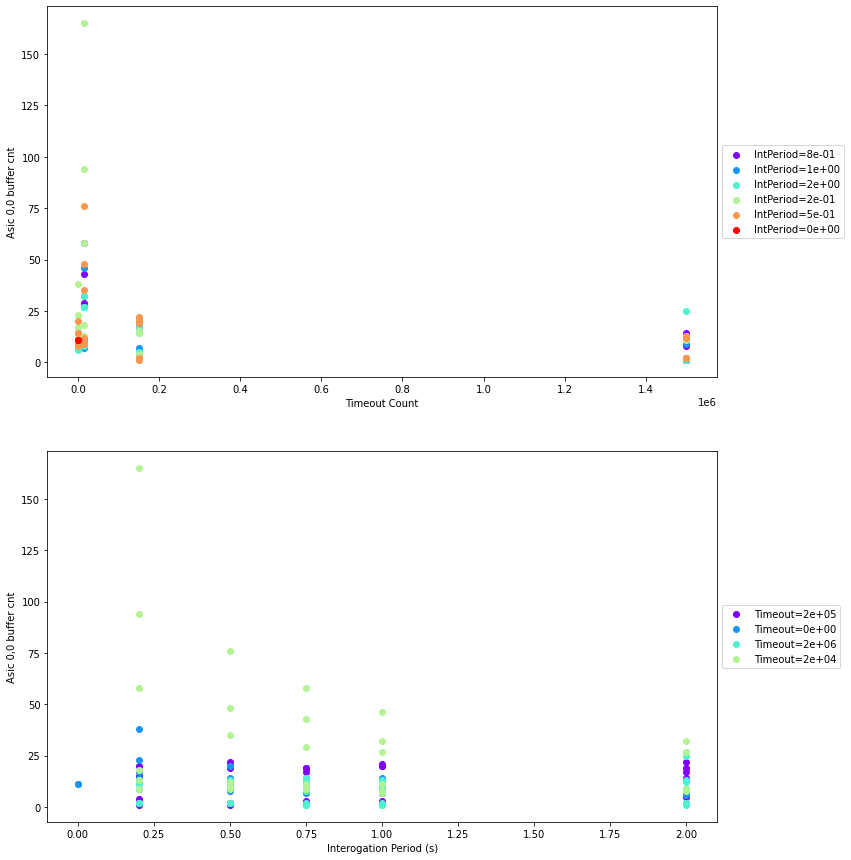

In [37]:
# fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,7))
# TODO different colors, different intervals
import matplotlib.patches as mpatches
typs = ["Frq", "Timeout", "IntPeriod"]
fig, ax = plt.subplots(2,1, figsize=(12,15))
for i in range(len(IntPeriods)):
        f = asic0[(asic0["IntPeriod"] == IntPeriods[i])]
        y = f["Remote Max"]
        x = f["Timeout"]
        ax[0].scatter(x,y,label=f"IntPeriod={IntPeriods[i]:2.0e}", color=colors[i])
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in range(len(timeouts)):
        f = asic0[(asic0["Timeout"] == timeouts[i])]
        y = f["Remote Max"]
        x = f["IntPeriod"]
        ax[1].scatter(x,y,label=f"Timeout={timeouts[i]:2.0e}", color=colors[i])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[0].set_xlabel("Timeout Count")
ax[1].set_xlabel("Interogation Period (s)")
ax[0].set_ylabel("Asic 0,0 buffer cnt")
ax[1].set_ylabel("Asic 0,0 buffer cnt")
plt.savefig("TimeoutIntP.png", bbox_inches='tight')

{0.75, 1.0, 2.0, 0.2, 0.5, 0.0}


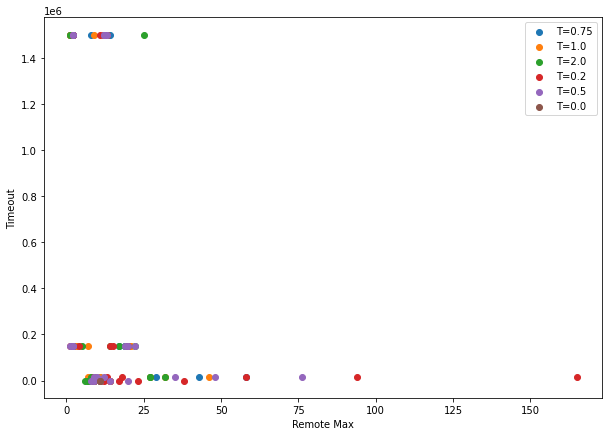

In [6]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,7))
# ax.scatter(asic0["Remote Max"].values, asic0["Timeout"].values)
int_times = set(asic0["IntPeriod"].values)
print(int_times)
for i in int_times:
    df = asic0[asic0["IntPeriod"] == i]
    x = df["Remote Max"]
    y = df["Timeout"]
    ax.scatter(x, y, label=f"T={i}")
    ax.set_xlabel("Remote Max")
    ax.set_ylabel("Timeout")
ax.legend()

{150000.0, 0.0, 1500000.0, 15000.0}


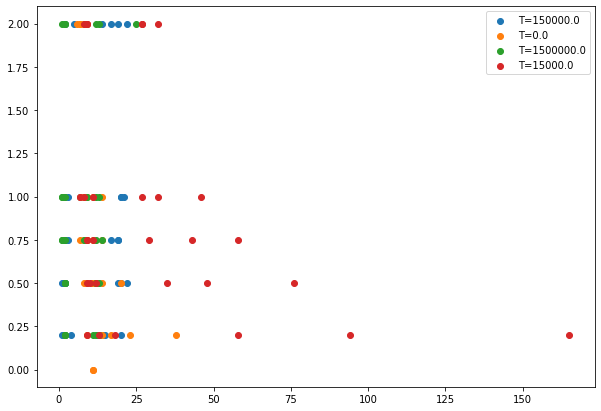

In [7]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,7))
times_outs = set(asic0["Timeout"].values)
print(times_outs)
for i in times_outs:
    df = asic0[asic0["Timeout"] == i]
    x = df["Remote Max"]
    y = df["IntPeriod"]
    sh = df["Route"]
    # m = ['o' if r == 'snake' else '.' for r in sh]
    # ax.scatter(x, y, marker=m, label=f"T={i}")
    ax.scatter(x, y, label=f"T={i}")
ax.legend()